# Analyse de données de la configuration 11x11 du jeux Gomoku

Dans le but d'évaluer la performance de notre algorithme selon différentes configurations, nous avons produit des données en format csv pour la configuration 11x11.

### Alpha_Beta avec une profondeur de 1 et une limite de temps de 10 secondes 
Afin d'avoir un visuel sur les performances fournis, on décide de calculer en premier la moyenne de temps d'exécution des 20 parties jouées.

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 
import csv

#Calculer le temps total de jeu pour chaque game
game_times = []
score_heuristique_finaux = []
for i in range(1, 21):
    game_dataframe = pd.read_csv('./board_11X11/depth_1_timelimit_10/game{0}.csv'.format(i))
    
    if (game_dataframe.iloc[-1]["score_heuristique"] != 0):
        score_heuristique_finaux.append(abs(game_dataframe.iloc[-1]["score_heuristique"]))
        score_heuristique_finaux.append(abs(game_dataframe.iloc[-2]["score_heuristique"]))
    else:
        score_heuristique_finaux.append(abs(game_dataframe.iloc[-1]["score_heuristique"]))
    
    game_time = game_dataframe["duree_tour"].sum()
    game_times.append(game_time)

    print("Game {0} : {1}s".format(i, format(game_time, ".2f")))

Game 1 : 16.92s
Game 2 : 17.67s
Game 3 : 17.95s
Game 4 : 18.06s
Game 5 : 10.26s
Game 6 : 17.25s
Game 7 : 17.52s
Game 8 : 18.25s
Game 9 : 11.45s
Game 10 : 18.00s
Game 11 : 18.16s
Game 12 : 17.65s
Game 13 : 18.28s
Game 14 : 19.03s
Game 15 : 13.21s
Game 16 : 18.34s
Game 17 : 18.25s
Game 18 : 11.94s
Game 19 : 17.80s
Game 20 : 18.15s


La moyenne d'un jeu complet de temps de jeux en seconde est:

In [137]:
format(np.mean(game_times), ".2f")

'16.71'

On peut aussi s'interesser à la moyenne et variance d'un seul coup. Pour se faire, on est mieu d'etudier le suivant par rapport à l'alignement le plus long réalisé et ainsi avoir des métriques plus juste car on sait que le plus qu'on avance dans le jeux le moins de choix s'offre à nous. Ainsi, on peut calculer la moyenne et variance pour le jeux de données présent selon l'allignement le plus long.

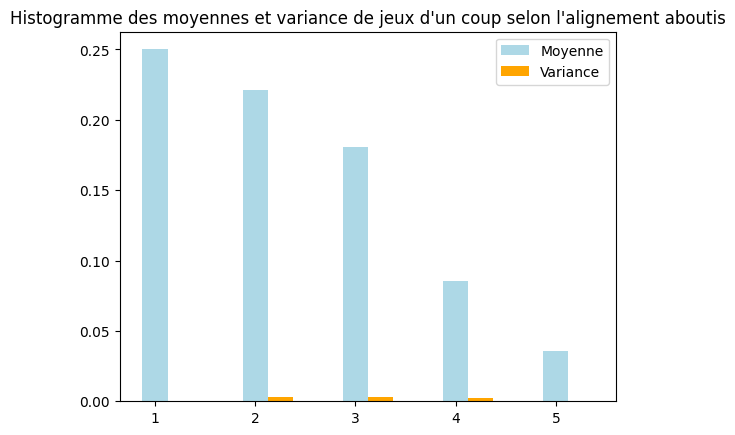

In [138]:
alignement_data = {}

for i in range(1, 21):
    game_dataframe = pd.read_csv('./board_11X11/depth_1_timelimit_10/game{0}.csv'.format(i))
    
    for index, row in game_dataframe.iterrows():
        if(not row["allignement_plus_long"] in alignement_data):
            alignement_data[row["allignement_plus_long"]] = []
            
        alignement_data[row["allignement_plus_long"]].append(row["duree_tour"])
            
alignement_stats = {}
alignement_means = []
alignement_variances = []

for key in alignement_data.keys():
    alignement_means.append(np.mean(alignement_data[key]))
    alignement_variances.append(np.var(alignement_data[key]))
    
shifted_pos = list(map(lambda x:x+0.25, alignement_data.keys()))
plt.bar(list(alignement_data.keys()), alignement_means, color='lightblue', label='Moyenne', width=0.25)
plt.bar(shifted_pos, alignement_variances, color='orange', label='Variance', width=0.25)
plt.title("Histogramme des moyennes et variance de jeux d'un coup selon l'alignement aboutis")
plt.legend()
plt.show()

Une autre métrique intéressante à consulter est la distribution du score de l'heuristique final du jeu pour mieux comprendre l'aboutissement du jeu soit à un match nul ou menant à un vainceur. Pour ce faire, on peut consulter les données en forme d'un histogramme

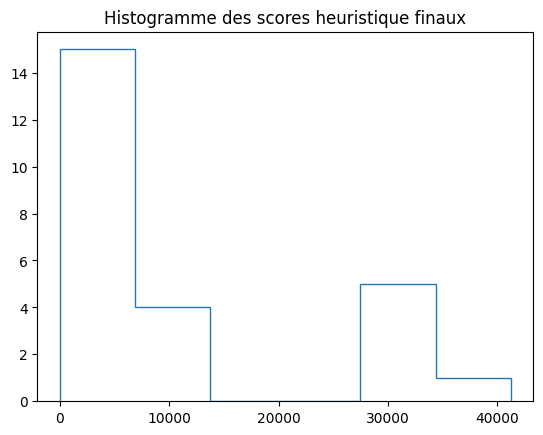

In [139]:
counts, bins = np.histogram(score_heuristique_finaux, bins='auto')
plt.stairs(counts, bins)
plt.title("Histogramme des scores heuristique finaux")
plt.show()

### Alpha_Beta avec une profondeur de 5 et une limite de temps de 5 secondes 
Pour mieu comparer les configurations possibles et potentiellement trouver la meilleur, on fait la même analyse précédente pour une profondeur de 5 ayant une limite de temps de 5s.

In [140]:
game_times = []
score_heuristique_finaux = []
for i in range(1, 21):
    game_dataframe = pd.read_csv('./board_11X11/depth_5_timelimit_5/game{0}.csv'.format(i))
    
    if (game_dataframe.iloc[-1]["score_heuristique"] != 0):
        score_heuristique_finaux.append(abs(game_dataframe.iloc[-1]["score_heuristique"]))
        score_heuristique_finaux.append(abs(game_dataframe.iloc[-2]["score_heuristique"]))
    else:
        score_heuristique_finaux.append(0)
    
    game_time = game_dataframe["duree_tour"].sum()
    game_times.append(game_time)

    print("Game {0} : {1}s".format(i, format(game_time, ".2f")))

Game 1 : 496.14s
Game 2 : 554.95s
Game 3 : 554.60s
Game 4 : 156.88s
Game 5 : 378.74s
Game 6 : 533.35s
Game 7 : 543.75s
Game 8 : 325.67s
Game 9 : 205.74s
Game 10 : 282.61s
Game 11 : 216.89s
Game 12 : 195.10s
Game 13 : 562.10s
Game 14 : 512.83s
Game 15 : 212.02s
Game 16 : 476.05s
Game 17 : 194.87s
Game 18 : 398.32s
Game 19 : 331.58s
Game 20 : 172.42s


La moyenne d'un jeu complet de temps de jeux en seconde est:

In [141]:
format(np.mean(game_times), ".2f")

'365.23'

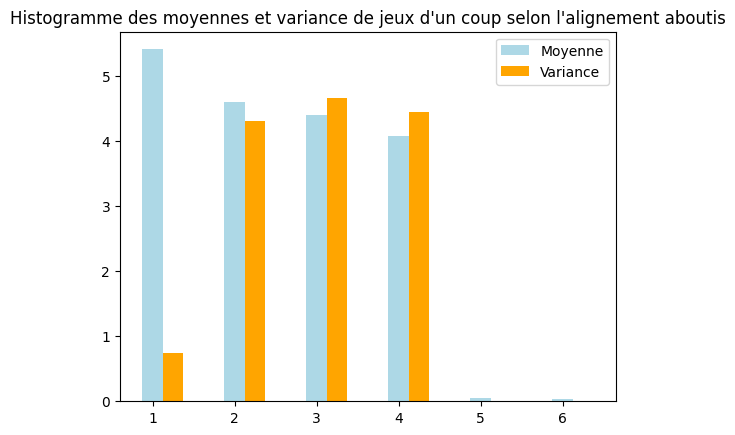

In [142]:
alignement_data = {}

for i in range(1, 21):
    game_dataframe = pd.read_csv('./board_11X11/depth_5_timelimit_5/game{0}.csv'.format(i))
    
    for index, row in game_dataframe.iterrows():
        if(not row["allignement_plus_long"] in alignement_data):
            alignement_data[row["allignement_plus_long"]] = []
            
        alignement_data[row["allignement_plus_long"]].append(row["duree_tour"])
            
alignement_means = []
alignement_variances = []

for key in alignement_data.keys():
    alignement_means.append(np.mean(alignement_data[key]))
    alignement_variances.append(np.var(alignement_data[key]))

shifted_pos = list(map(lambda x:x+0.25, alignement_data.keys()))
plt.bar(list(alignement_data.keys()), alignement_means, color='lightblue', label='Moyenne', width=0.25)
plt.bar(shifted_pos, alignement_variances, color='orange', label='Variance', width=0.25)
plt.title("Histogramme des moyennes et variance de jeux d'un coup selon l'alignement aboutis")
plt.legend()
plt.show()

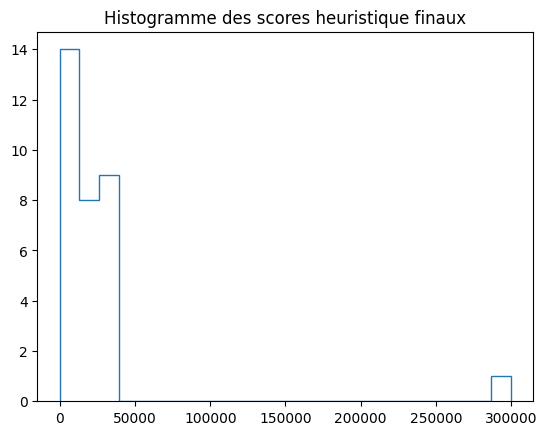

In [143]:
counts, bins = np.histogram(score_heuristique_finaux, bins='auto')
plt.stairs(counts, bins)
plt.title("Histogramme des scores heuristique finaux")
plt.show()